# PROYECTO 4


**AUTORES**: 

             Oscar Fallas B92861

             Daniel Chacon B72018
             
             Alejandro Castillo B81787
                                                                                            



**MODULACIÓN ASK**

Dada un secuencia de bits bcT almancenando cada bit en un arreglo, se procederá a realizar modulación ASK con M = 4

La secuencia de entrada es: [0 1 0 0 1 0 0]
La secuencia modulada s(k): [-0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.        ]
Cantidad de ceros agregados: 33


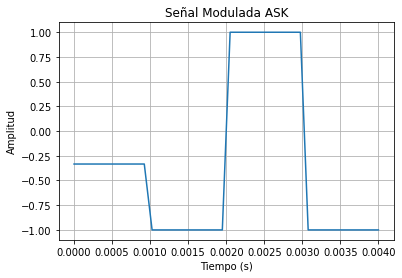

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M = 4

def modulacionASK(bc, fc, Ts):
    #Modulacion Banda Base
    # Verificar que la longitud de la secuencia de bits bc(ℓ) sea múltiplo de log2(M)
    b = int(np.log2(M))
    if len(bc) % b != 0:
        # Rellenar con ceros si no es múltiplo
        bc = np.concatenate([bc, np.zeros(b - len(bc) % b)])

    # Dividir la secuencia de bits en grupos de M
    grupos = [bc[i:i+int(np.log2(M))] for i in range(0, len(bc), int(np.log2(M)))]

    # Diccionario de asignación de símbolos de amplitud
    simbolos = {
        (0, 0): -1,
        (0, 1): -1/3,
        (1, 0): 1,
        (1, 1): 1/3
        }

    # Secuencia de símbolos a(n)
    an = [simbolos[tuple(grupo)] for grupo in grupos]

    #Modulacion paso banda ASK 

    # Secuencia de muestras c(k)
    Ns = int(Ts * fc)
    t = np.arange(0, Ns)
    c = np.cos(2 * np.pi * fc * t / Ns)

    # Secuencia de señal modulada sn(k)
    sn = np.kron(an, c)

    return sn

# Parámetros de la modulación
bcT = np.array([0, 1, 0, 0, 1, 0, 0])  # Secuencia de bits
fc = 10e3  # Frecuencia de la portadora (10 kHz)
Ts = 1e-3  # Duración de la señal c(t) (1 ms)

# Realizar la modulación ASK
s_k = modulacionASK(bcT, fc, Ts)

# Imprimir información sobre la modulación
print("La secuencia de entrada es:", bcT)
print("La secuencia modulada s(k):", s_k)
print("Cantidad de ceros agregados:", len(s_k) - len(bcT))

# Graficar la señal modulada
t = np.linspace(0, len(s_k) / fc, len(s_k))
plt.plot(t, s_k)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Modulada ASK')
plt.grid(True)
plt.show()

**MEDIO DE TRANSMISIÓN RUIDOSO**

Simule un medio de transmisión ruidoso definiendo un ruido N y almacenándola en una variable N. Escriba un programa que cambie aleatoriamente el valor de cada muestra de una secuencia de muestras transmitidos s(k), almacenada en un arreglo sT. Las muestras modificados deben conformar la secuencia de muestras recibidos  s∗(k), del mismo tamaño de s(k), almacenada en un arreglo sR.



In [2]:
import numpy as np
def add_noise(x, snr):
    # Calcular la potencia de la señal transmitida
    signal_power = np.mean(np.abs(x) ** 2)

    # Calcular la potencia del ruido en función de la relación señal-ruido (SNR)
    noise_power = signal_power / (10 ** (snr / 10))

    # Generar el ruido gaussiano
    noise = np.random.normal(0, np.sqrt(noise_power), len(x))

    # Sumar el ruido a la señal transmitida
    x_r = x + noise

    return x_r

snr = 10  # Relación señal-ruido (SNR) en dB
s_R = add_noise(s_k, snr)
print("Secuencia con ruido:", s_R)

# Realizar cambios aleatorios en las muestras transmitidas
N = np.random.normal(0, 1, len(s_k))
s_star_k = s_k + N
print("Secuencia recibida:", s_star_k)

Secuencia con ruido: [-0.49417415 -0.73630852 -0.45714735 -0.60086711 -0.84566828 -0.1969453
 -0.68339399 -0.74284523 -0.87827618 -0.26052398 -0.74120247 -1.07598807
 -0.8190533  -0.95412427 -0.97728748 -1.0145853  -0.48713864 -0.91494769
 -0.79283389 -1.19181751  0.78411278  0.95407509  0.79415353  1.4130678
  0.65267602  0.72552064  1.38094762  1.27205455  0.64354062  1.10790027
 -1.37041247 -0.86128671 -0.98162043 -1.184326   -0.9295129  -1.4691028
 -1.15183499 -1.42760296 -0.65865259 -1.36619044]
Secuencia recibida: [ 4.26078240e-01 -6.35922728e-01 -9.35306231e-01 -2.03023537e-01
 -1.17703752e+00 -1.78850253e+00  2.27016607e-01  7.27405116e-01
 -3.06503655e+00  1.58379595e-01 -2.80082273e+00 -1.35012793e-01
 -1.71591835e+00 -6.60024821e-02 -3.36476237e-01 -2.31840688e+00
 -2.56191084e+00 -9.93671180e-01 -7.90712747e-01 -9.98906667e-01
 -9.45468179e-01  1.06593515e+00  2.21124045e+00  3.44240747e+00
 -1.30958989e+00  1.97640455e-03  2.81017757e+00  8.56459720e-01
  2.05950404e+00 -2

**Desmodulador digital paso-base**
Simule un desmodulador digital paso-banda que utilice un esquema de modulación ASK de orden M, definiendo un procedimiento de muestreo o de integración y descarte y escribiendo un programa que recupere los bits de una secuencia de información, almacenada en un arreglo a partir de una secuencia de muestras.


In [3]:
import numpy as np

s_k = modulacionASK(bcT, fc, Ts)

def desmoduladorASK(sn, fc, Ts):
    # Número de niveles de amplitud en la modulación ASK
    M = 4

    # Umbrales para la detección de amplitud
    umbrales = [-1.5, -0.5, 0.5, 1.5]

    # Número de muestras por símbolo
    Ns = int(Ts * fc)

    # Número de símbolos en la señal modulada
    num_simbolos = len(sn) // Ns

    # Inicializar la secuencia de bits de salida
    bits_recibidos = []

    # Procesar cada símbolo
    for i in range(num_simbolos):
        # Obtener una muestra del símbolo
        muestra_simbolo = sn[i * Ns: (i + 1) * Ns]

        # Calcular el promedio de la muestra del símbolo
        promedio_muestra = np.mean(muestra_simbolo)

        # Encontrar el índice del umbral más cercano al promedio de la muestra
        indice_umbral = min(range(len(umbrales)), key=lambda x: abs(umbrales[x] - promedio_muestra))

        # Convertir el índice del umbral en la secuencia de bits del símbolo
        bits_simbolo = [int(bit) for bit in np.binary_repr(indice_umbral, width=int(np.log2(M)))]

        # Agregar la secuencia de bits del símbolo a la secuencia de bits recibidos
        bits_recibidos.extend(bits_simbolo)

    # Verificar si se agregaron ceros adicionales durante la modulación
    diferencia = len(bits_recibidos) % int(np.log2(M))
    if diferencia > 0:
        # Eliminar los ceros adicionales
        bits_recibidos = bits_recibidos[:-diferencia]

    return np.array(bits_recibidos)





############# Prueba #################


# Realizar la desmodulación ASK
secuencia_recibida = desmoduladorASK(s_k, fc, Ts)

# Imprimir información sobre la demodulación

print("La secuencia desmodulada es:", secuencia_recibida)





La secuencia desmodulada es: [0 1 0 0 1 0 0 0]


**Proyecto Integrado**

En la siguiente sección se procede a conectar los componentes de modulación y demodulación con las partes anteriormente realizadas(codificador de fuente, codificador de canal) con el fin de comprobar su correcto funcionamiento. Para estoy dirigase al archivo proyecto_integrado.py, este se le realizó una interfaz interactiva para que el usuario escoja que elementos quiere probar:

                                                                                                    --opcion 1--: codificación canal 
                                                                                                    --opcion 2--: cofificación de fuente y canal
                                                                                                    --opcion 3--: codificación de fuente, canal y modulacion banda base
                                                                                                    --opcion4--: esquema de comunicación completo

Tambien, en el código abajo note que se exporta el archivo por lo que puede utilizarlo desde aquí. Además, el código despliega toda la información necesaria para ir demostrando que se cumple satisfactoriamente el proceso de comunicación. 

In [4]:
import proyecto_integrador as pi

# Menú
print("Menú de opciones:")
print("1. Opción 1: Codificación de canal")
print("2. Opción 2: Codificación de fuente y canal")
print("3. Opción 3: Codificación de fuente, canal y modulación PAM")
print("4. Opcion 4: Codificación de fuente, canal y modulación ASK")

opcion_seleccionada = int(input("Seleccione una opción: "))
pi.menu(opcion_seleccionada)

Menú de opciones:
1. Opción 1: Codificación de canal
2. Opción 2: Codificación de fuente y canal
3. Opción 3: Codificación de fuente, canal y modulación banda base
4. Opción 4: Codificación de fuente, canal y modulación paso banda


Ha seleccionado la opción 4
El mensaje es: Hola
El mensaje codificado con formato de impresión binaria:  0b1001000011011110110110001100001
El mensaje codificado es:  01001000011011110110110001100001
Antes correcion:  [0 1 0 0 1 0 1]
sindrome: 010
0
Despues correcion:  [0 1 0 0 1 1 1]
Antes correcion:  [0 0 0 0 1 0 1]
sindrome: 101
0
Despues correcion:  [1 0 0 0 1 0 1]
Antes correcion:  [0 1 1 0 0 0 1]
sindrome: 000
0
Despues correcion:  [0 1 1 0 0 0 1]
Antes correcion:  [0 1 0 1 0 1 0]
sindrome: 110
0
Despues correcion:  [0 1 1 1 0 1 0]
Antes correcion:  [0 1 1 0 0 0 1]
sindrome: 000
0
Despues correcion:  [0 1 1 0 0 0 1]
Antes correcion:  [0 1 0 0 0 1 0]
sindrome: 101
0
Despues correcion:  [1 1 0 0 0 1 0]
Antes correcion:  [0 1 1 0 0 0 1]
sindrome: 000
0
Despues correcion:  [0 1 1 0 0 0 1]
Antes correcion:  [0 0 0 1 0 1 0]
sindrome: 001
0
Despues correcion:  [0 0 0 1 0 1 1]
Secuencia enviada:  01001000011011110110110001100001
La secuencia modulada x(k):  [-0.33333333 -0.33333333 -0.333